In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import the library for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 1000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('/content/drive/MyDrive/BigData/Beauty.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Example review text
review_text = "This movie was fantastic! I really enjoyed it."

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores
sentiment_scores = sia.polarity_scores(review_text)

print("VADER Sentiment Scores:", sentiment_scores)


VADER Sentiment Scores: {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.8169}


In [ ]:
print(len(myData))
# Check the Not Null Nodes
myData.notnull().sum()

602777


overall           602777
vote               65262
verified          602777
reviewTime        602777
reviewerID        602777
asin              602777
style             137973
reviewerName      602762
reviewText        602453
summary           602649
unixReviewTime    602777
image               9258
dtype: int64

In [ ]:
# Initiate an empty list to store sliced dataframes (chunks)
myListm = []

# Specify the chunksize
chunksize = 1000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('/content/drive/MyDrive/BigData/meta_Appliances.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myListm.append(chunk)

# put the chunks together
myMeta = pd.concat(myListm,axis=0)

In [ ]:
print(len(myMeta))
# Check the Not Null Nodes
myMeta.notnull().sum()

30445


category           30445
tech1              30445
description        30445
fit                30445
title              30445
also_buy           30445
tech2              30445
brand              30445
feature            30445
rank               30445
also_view          30445
details            30445
main_cat           30445
similar_item       30445
date               28456
price              30445
asin               30445
imageURL           30445
imageURLHighRes    30445
dtype: int64

In [ ]:
myData.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2.0,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN


In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [ ]:
# Define some functions for convenience

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

In [ ]:
# Generate a new column to store the compound scores

myData['sentiment_score'] = myData.apply(lambda x: getSentScore(x['clean_review']), axis=1)

In [ ]:
# Take a look of DataSet
myData.head(3)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,clean_review,sentiment_score
0,5,2.0,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN,Not one thing in this book seemed an obvious o...,0.9836
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN,I have enjoyed Dr Alan Gregerman's weekly blo...,0.9925
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN,Alan Gregerman believes that innovation comes ...,0.9531


In [ ]:
# Check the Null Nodes
myData.isnull().sum()

overall                 0
vote               537515
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              464804
reviewerName           15
reviewText              0
summary               128
unixReviewTime          0
image              593519
clean_review            0
sentiment_score         0
dtype: int64

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Example review text
review_text = "This movie was fantastic! I really enjoyed it."

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores
sentiment_scores = sia.polarity_scores(review_text)

print("VADER Sentiment Scores:", sentiment_scores)

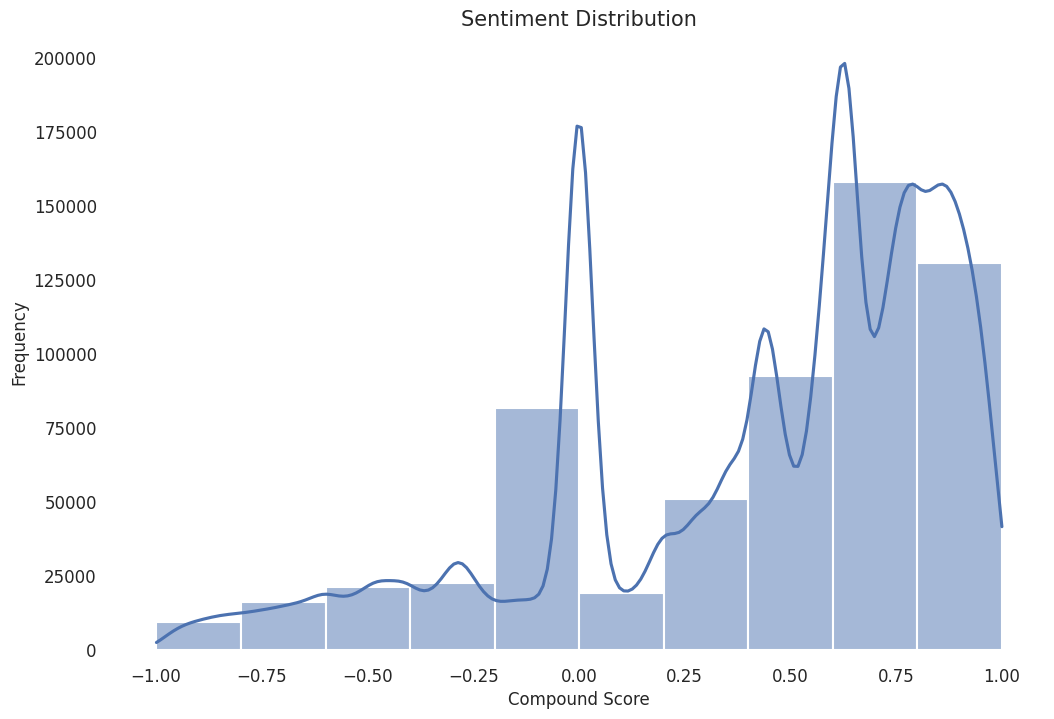

In [ ]:
# Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,8))

# Use histplot
sns.histplot(x="sentiment_score",
             data=myData,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.2
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score", fontsize = 12)

# Set font size to axis
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

# Remove ylabel
ax.set_ylabel("Frequency", fontsize = 12)

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 15)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

In [ ]:
# Creating a CSV File for all data
Appliances_Data = myData[['overall', 'reviewTime', 'asin', 'reviewText', 'summary', 'clean_review', 'sentiment_score']]

# Save the subset as a new CSV file
Appliances_Data.to_csv('/content/drive/MyDrive/BigData/Appliances.csv', index=False)

In [ ]:
# Creating a CSV File for all data
Appliances_Meta = myMeta[['category', 'title', 'asin', 'brand', 'main_cat', 'price']]6

# Save the subset as a new CSV file
Appliances_Meta.to_csv('/content/drive/MyDrive/BigData/Appliances.csv', index=False)

In [ ]:
# join the two dataframes based on a particular variable
joined_AppliancesData = pd.merge(Appliances_Data, Appliances_Meta, on='asin')

# save the joined dataframe as a new CSV file
joined_AppliancesData.to_csv('/content/drive/MyDrive/BigData/Appliances_Combined.csv', index=False)

In [ ]:
# Load data from CSV file
df_all = pd.read_csv('/content/drive/MyDrive/BigData/Appliances_Combined.csv')

In [ ]:
# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/BigData/Appliances.csv')

In [ ]:
# Take a look of DataSet
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615747 entries, 0 to 615746
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          615747 non-null  int64  
 1   reviewTime       615747 non-null  object 
 2   asin             615747 non-null  object 
 3   reviewText       615392 non-null  object 
 4   summary          615605 non-null  object 
 5   clean_review     615266 non-null  object 
 6   sentiment_score  615747 non-null  float64
 7   category         615747 non-null  object 
 8   title            615747 non-null  object 
 9   brand            610830 non-null  object 
 10  main_cat         615434 non-null  object 
 11  price            494269 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 56.4+ MB


In [ ]:
# Take a look of DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30445 entries, 0 to 30444
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  30445 non-null  object
 1   title     30445 non-null  object
 2   asin      30445 non-null  object
 3   brand     29857 non-null  object
 4   main_cat  30354 non-null  object
 5   price     20153 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [ ]:
# Check the Null Nodes
df_all.isnull().sum()

overall                 0
reviewTime              0
asin                    0
reviewText              0
summary               142
clean_review          481
sentiment_score         0
category                0
title                   0
brand                4917
main_cat              313
price              121478
dtype: int64

In [ ]:
# Check the Null Nodes
df.isnull().sum()

category        0
title           0
asin            0
brand         588
main_cat       91
price       10292
dtype: int64

In [ ]:
# Install necessary libraries
!pip install pandas wordcloud matplotlib

# Import libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

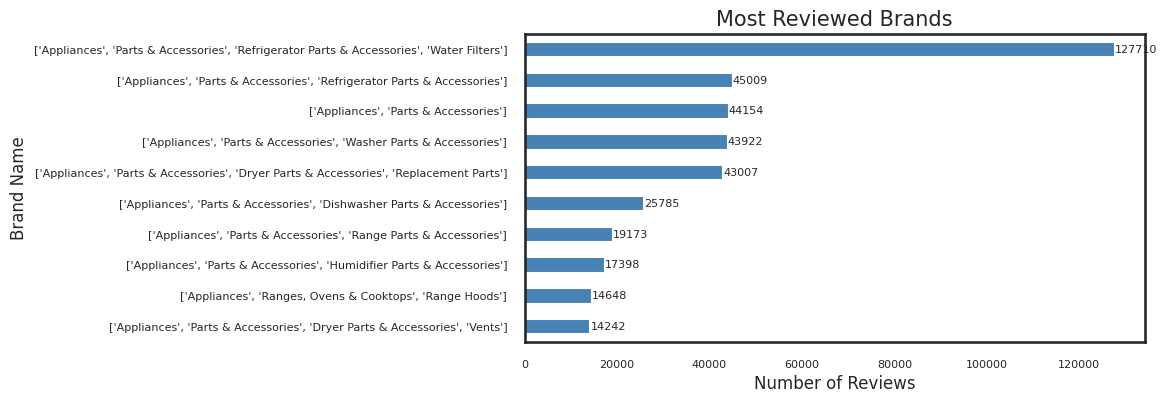

In [ ]:
# Assuming df_all is your DataFrame
# Replace 'product_name' with the actual column name in your DataFrame
value_counts = df_all['category'].value_counts().head(10)

# Reverse the order
value_counts = value_counts.iloc[::-1]

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the horizontal bar chart
ax = value_counts.plot(kind='barh', color='steelblue')

# Add review count labels to the bars
for i, v in enumerate(value_counts):
    ax.text(v + 1, i, str(v), va='center', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)  # Change ylabel to reflect the change
plt.title('Most Reviewed Brands', fontsize=15)

plt.show()


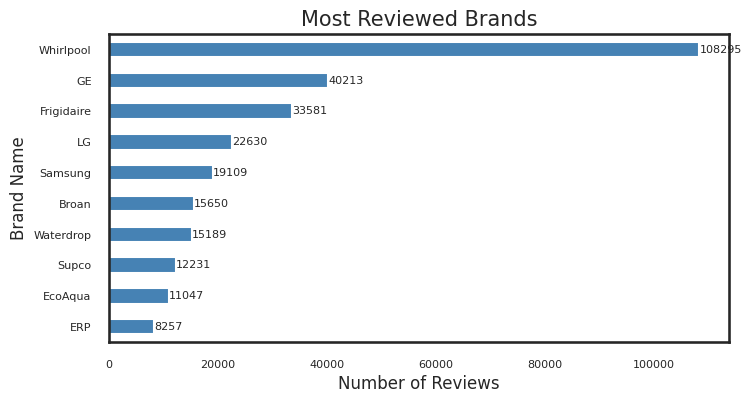

In [ ]:
# Assuming df_all is your DataFrame
# Replace 'product_name' with the actual column name in your DataFrame
value_counts = df_all['brand'].value_counts().head(10)

# Reverse the order
value_counts = value_counts.iloc[::-1]

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the horizontal bar chart
ax = value_counts.plot(kind='barh', color='steelblue')

# Add review count labels to the bars
for i, v in enumerate(value_counts):
    ax.text(v + 1, i, str(v), va='center', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)  # Change ylabel to reflect the change
plt.title('Most Reviewed Brands', fontsize=15)

plt.show()

In [ ]:
# Fill NaN values in 'reviewText' column with empty string
df_all['reviewText'] = df_all['reviewText'].fillna('')

# Concatenate text data
text = ' '.join(df_all['reviewText'])

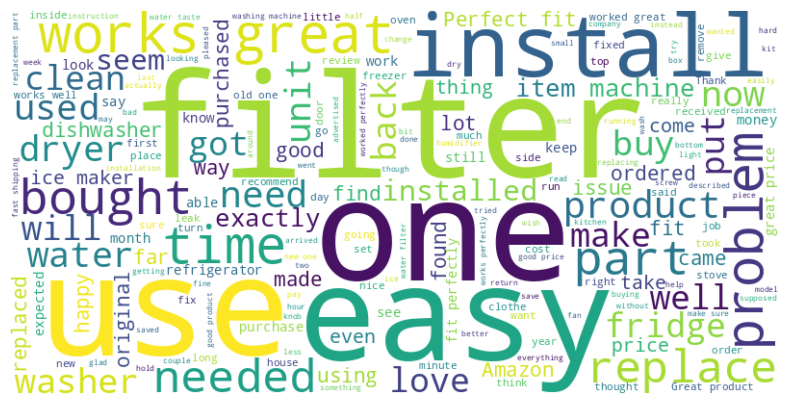

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150).generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


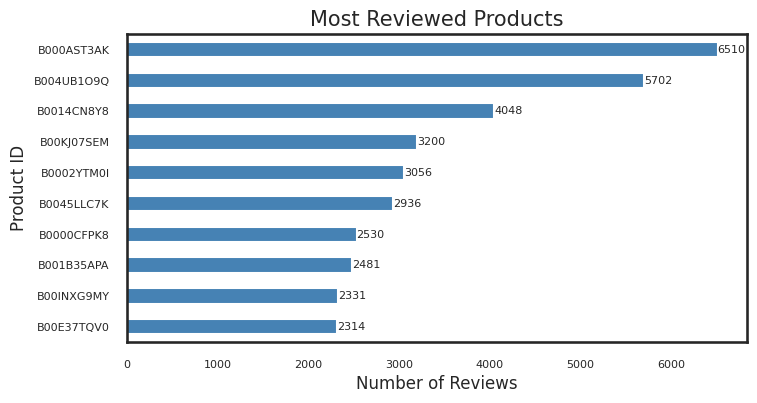

In [ ]:
# Calculate percentage for each bar
value_counts = df_all['asin'].value_counts().head(10)

# Reverse the order
value_counts = value_counts.iloc[::-1]

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the horizontal bar chart
ax = value_counts.plot(kind='barh', color='steelblue')

# Add review count labels to the bars
for i, v in enumerate(value_counts):
    ax.text(v + 1, i, str(v), va='center', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Product ID', fontsize=12)
plt.title('Most Reviewed Products', fontsize=15)

plt.show()


In [ ]:
# Drop the rows where there are no reviews
df_all.dropna(subset = ['reviewText'], inplace = True)

# Changing the reviewTime column to be of datetime type
df_all.reviewTime = pd.to_datetime(df_all.reviewTime)

# Creating a column with just the year
df_all['year'] = df_all.reviewTime.dt.year

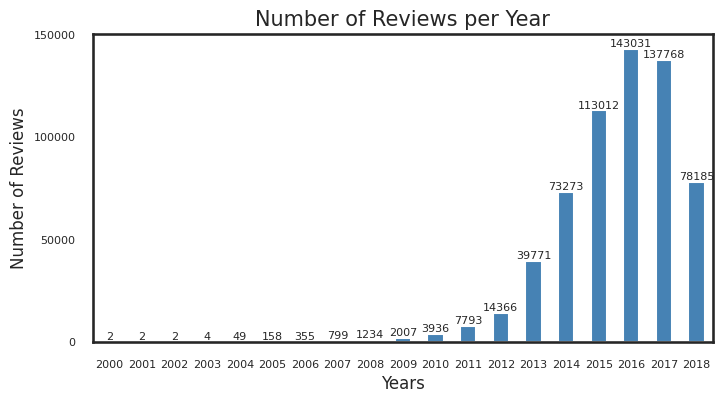

In [ ]:
# Calculate number of reviews for each year and sort by index
reviews_per_year = df_all['year'].value_counts().sort_index()

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the bar chart
ax = reviews_per_year.plot(kind='bar', color='steelblue')

# Add count labels to the bars
for i, v in enumerate(reviews_per_year):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Number of Reviews per Year', fontsize=15)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)

plt.show()


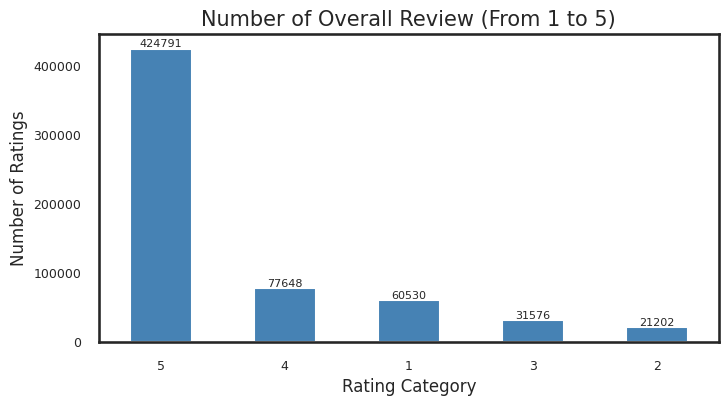

In [ ]:
# Calculate number of ratings for each rating value
rating_counts = df_all['overall'].value_counts()

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the bar chart
ax = rating_counts.plot(kind='bar', color='steelblue')

# Add count labels to the bars
for i, v in enumerate(rating_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Number of Overall Review (From 1 to 5)', fontsize=15)
plt.xlabel('Rating Category', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Number of Ratings', fontsize=12)

plt.show()


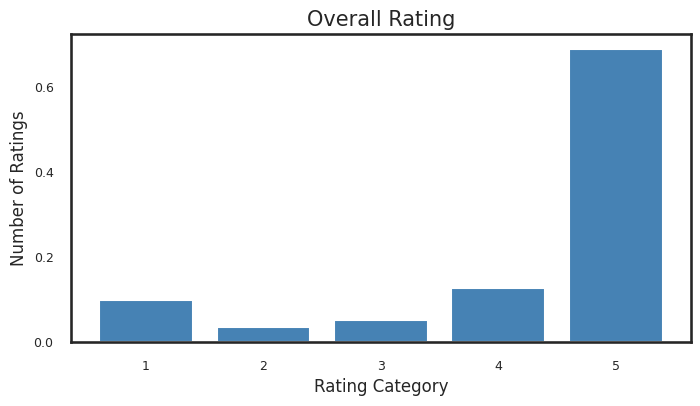

In [ ]:
# Assuming df is your DataFrame containing the ratings data
# Replace 'overall' with the actual column name containing ratings if needed
ratings_counts = df_all['overall'].value_counts().sort_index()

# Calculate the proportion of each rating category
proportion = ratings_counts / ratings_counts.sum()

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the proportion of each rating category as a bar chart
plt.bar(proportion.index, proportion, color='steelblue')

# Customize the axis labels and ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Overall Rating', fontsize=15)
plt.xlabel('Rating Category', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Number of Ratings', fontsize=12)

plt.show()


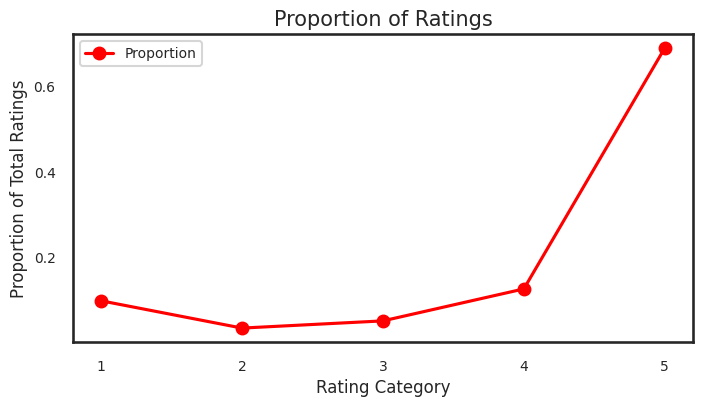

In [ ]:
# Assuming df is your DataFrame containing the ratings data
# Replace 'overall' with the actual column name containing ratings if needed
ratings_counts = df_all['overall'].value_counts().sort_index()

# Calculate the proportion of each rating category
proportion = ratings_counts / ratings_counts.sum()

# Set width and height
plt.figure(figsize=(8, 4))

# Plotting the proportion of each rating category
plt.plot(proportion.index, proportion, color='red', marker='o', label='Proportion')

# Set the font size for the legend
plt.legend(loc='upper left', fontsize=10)  # Adjust font size here

# Customize the axis labels and ticks
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Proportion of Total Ratings', fontsize=12)
plt.title('Proportion of Ratings', fontsize=15)
plt.xticks(ratings_counts.index, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


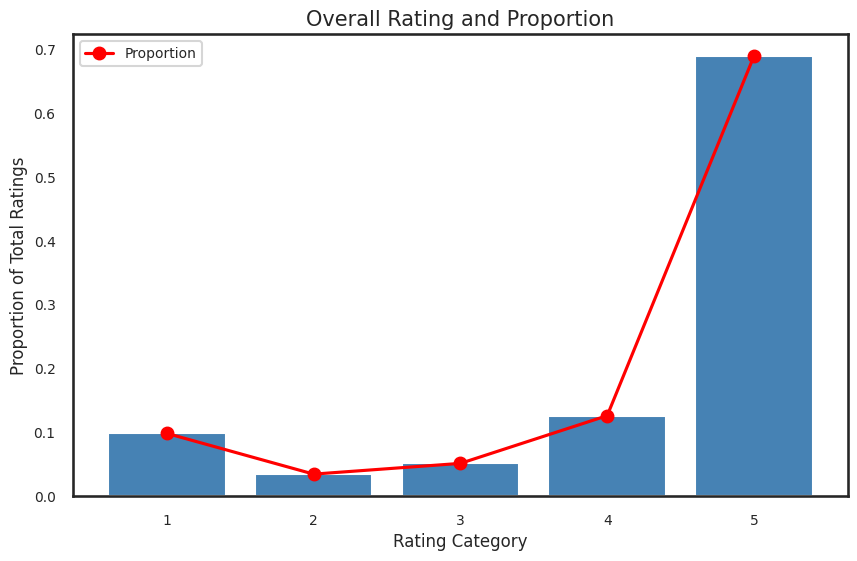

In [ ]:
# Assuming df is your DataFrame containing the ratings data
# Replace 'overall' with the actual column name containing ratings if needed
ratings_counts = df_all['overall'].value_counts().sort_index()

# Calculate the proportion of each rating category
proportion = ratings_counts / ratings_counts.sum()

# Set width and height
plt.figure(figsize=(10, 6))

# Plotting the proportion of each rating category as a bar chart
plt.bar(proportion.index, proportion, color='steelblue')

# Plotting the proportion of each rating category as a line chart
plt.plot(proportion.index, proportion, color='red', marker='o', label='Proportion')

# Customize the axis labels and ticks
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Proportion of Total Ratings', fontsize=12)
plt.title('Overall Rating and Proportion', fontsize=15)
plt.xticks(ratings_counts.index, fontsize=10)
plt.yticks(fontsize=10)

# Set the font size for the legend
plt.legend(loc='upper left', fontsize=10)

plt.show()


In [ ]:
# Get a bunch of tools from nltk
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Most Common Words

# Import necessary libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Tokenize the text
tokens = word_tokenize(text)

# Convert tokens to lowercase
words = [word.lower() for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = stopwords.words('english')
filtered_words = [word for word in words if word not in stop_words]

# Calculate frequency distribution
fdist = FreqDist(filtered_words)


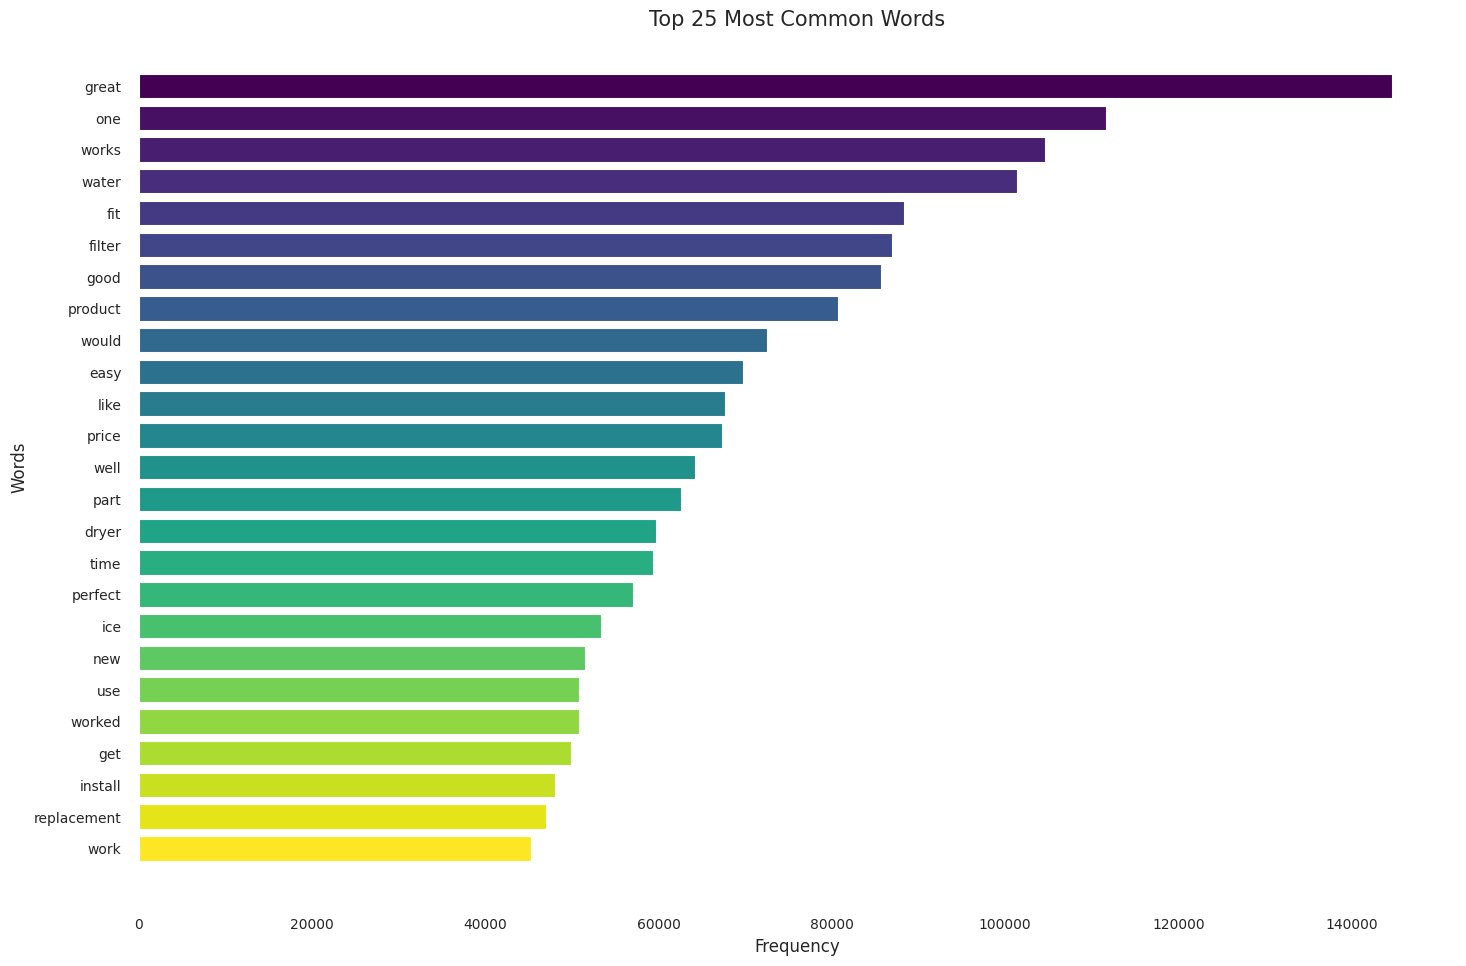

In [ ]:
import numpy as np

# Get most common words and their frequencies
most_common_words = fdist.most_common(25)

# Extract words and frequencies
words = [word[0] for word in most_common_words]
frequencies = [freq[1] for freq in most_common_words]

# Plot horizontal bar graph with different colors
plt.figure(figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate colors
bars = plt.barh(words, frequencies, color=colors)  # Horizontal bar graph

# Add labels and title
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Words', fontsize=12)  # Switched from xlabel to ylabel
plt.xlabel('Frequency', fontsize=12)  # Switched from ylabel to xlabel
plt.title('Top 25 Most Common Words', fontsize=15)

# Remove axis lines
plt.box(False)

# Customize tick labels
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
plt.show()

## 3. Postive and Negative Sentiment

*   *Word Cloud*
*   3.1. Sentiment Scores Distribution Visualise the result
*   3.2. Most Frequent Words (Bar Chart)
*   3.3. Most Frequent Words (Word Cloud)
*   3.4. Bigram Network







In [ ]:
# Import necessary libraries
import pandas as pd

# Load data from CSV file
myData = pd.read_csv('/content/drive/MyDrive/BigData/Appliances.csv', encoding='latin1')

# Check the column names in the DataFrame
print(myData.columns)

# Ensure that the column names match the ones in your dataset
# Adjust the column names accordingly if needed
# For example, if the text column is named 'reviewText' instead of 'text':
myData['clean_rw'] = myData['reviewText'].str.replace("@[\w]*", "", regex=True)
myData['clean_rw'] = myData['clean_rw'].str.replace("https?://[a-zA-Z0-9./]*", "", regex=True)
myData['clean_rw'] = myData['clean_rw'].str.replace("[^a-zA-Z']", " ", regex=True)
myData['clean_rw'] = myData['clean_rw'].str.strip()
myDataLongRw = myData[myData['clean_rw'].str.len() > 50]

# You can continue your preprocessing steps or analysis here
print(myDataLongRw.columns)

Index(['overall', 'reviewTime', 'asin', 'reviewText', 'summary',
       'clean_review', 'sentiment_score'],
      dtype='object')
Index(['overall', 'reviewTime', 'asin', 'reviewText', 'summary',
       'clean_review', 'sentiment_score', 'clean_rw'],
      dtype='object')


In [ ]:
myDataLongRw.head(3)

,overall,reviewTime,asin,reviewText,summary,clean_review,sentiment_score,clean_rw
0,5,"11 27, 2013",1118461304,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,Not one thing in this book seemed an obvious o...,0.9836,Not one thing in this book seemed an obvious o...
1,5,"11 1, 2013",1118461304,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,I have enjoyed Dr Alan Gregerman's weekly blo...,0.9925,I have enjoyed Dr Alan Gregerman's weekly blo...
2,5,"10 10, 2013",1118461304,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,Alan Gregerman believes that innovation comes ...,0.9531,Alan Gregerman believes that innovation comes ...


In [ ]:
# Define some functions for convenience

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
# Generate a new column to store the compound scores
myDataLongRw['sentiment_cat'] = myDataLongRw.apply(lambda x: getSentCat(x['clean_rw']), axis=1)

<ipython-input-37-8f0be32b8c96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDataLongRw['sentiment_cat'] = myDataLongRw.apply(lambda x: getSentCat(x['clean_rw']), axis=1)


In [ ]:
myDataLongRw.head(3)

,overall,reviewTime,asin,reviewText,summary,clean_review,sentiment_score,clean_rw,sentiment_cat
0,5,"11 27, 2013",1118461304,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,Not one thing in this book seemed an obvious o...,0.9836,Not one thing in this book seemed an obvious o...,positive
1,5,"11 1, 2013",1118461304,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,I have enjoyed Dr Alan Gregerman's weekly blo...,0.9925,I have enjoyed Dr Alan Gregerman's weekly blo...,positive
2,5,"10 10, 2013",1118461304,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,Alan Gregerman believes that innovation comes ...,0.9531,Alan Gregerman believes that innovation comes ...,positive


In [ ]:
import pandas as pd
import itertools

# Get a bunch of tools from nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Import bigrams
from nltk import bigrams

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myDataLongRw[myDataLongRw['sentiment_cat']=='positive']
# Take the reviews
myReviewPos = myDataPos['clean_rw']
# Make a single string
all_review_pos = ' '.join(myReviewPos)
# Break to words
myWordsPos = word_tokenize(all_review_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myDataLongRw[myDataLongRw['sentiment_cat']=='negative']
# Take the reviews
myReviewNeg = myDataNeg['clean_rw']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)
# Break to words
myWordsNeg = word_tokenize(all_review_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

In [ ]:
# Get the words for neurtal sentiment

# Subset the data
myDataNeu = myDataLongRw[myDataLongRw['sentiment_cat']=='neurtal']
# Take the reviews
myReviewNeu = myDataNeu['clean_rw']
# Make a single string
all_review_neu = ' '.join(myReviewNeu)
# Break to words
myWordsNeu = word_tokenize(all_review_neu)
# Remove stopwords and cases
myWordsNeu_noSW_noCase = [word.lower() for word in myWordsNeu if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringNeu = " ".join(myWordsNeu_noSW_noCase)

In [ ]:
# Use the package wordcloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews',fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews',fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myDataLongRw[myDataLongRw['sentiment_cat']=='positive']
# Take the reviews
myReviewPos = myDataPos['clean_rw']
# Make a single string
all_review_pos = ' '.join(myReviewPos)
# Break to words
myWordsPos = word_tokenize(all_review_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistPos = FreqDist(myWordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFPos = pd.DataFrame(fDistPos.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

# Generate lists of bigrams for network visualisation
myTokensPos = [word_tokenize(tweet) for tweet in myDataPos['clean_rw']]
myTokensPos_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensPos]
myBigramPos = [list(bigrams(tweet)) for tweet in myTokensPos_noSW_noCase]
myBigramListPos = list(itertools.chain.from_iterable(myBigramPos))
bigramFreqPos = FreqDist(myBigramListPos)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myDataLongRw[myDataLongRw['sentiment_cat']=='negative']
# Take the reviews
myReviewNeg = myDataNeg['clean_rw']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)
# Break to words
myWordsNeg = word_tokenize(all_review_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistNeg = FreqDist(myWordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFNeg = pd.DataFrame(fDistNeg.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

# Generate lists of bigrams for network visualisation
myTokensNeg = [word_tokenize(tweet) for tweet in myDataNeg['clean_rw']]
myTokensNeg_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensNeg]
myBigramNeg = [list(bigrams(tweet)) for tweet in myTokensNeg_noSW_noCase]
myBigramListNeg = list(itertools.chain.from_iterable(myBigramNeg))
bigramFreqNeg = FreqDist(myBigramListNeg)

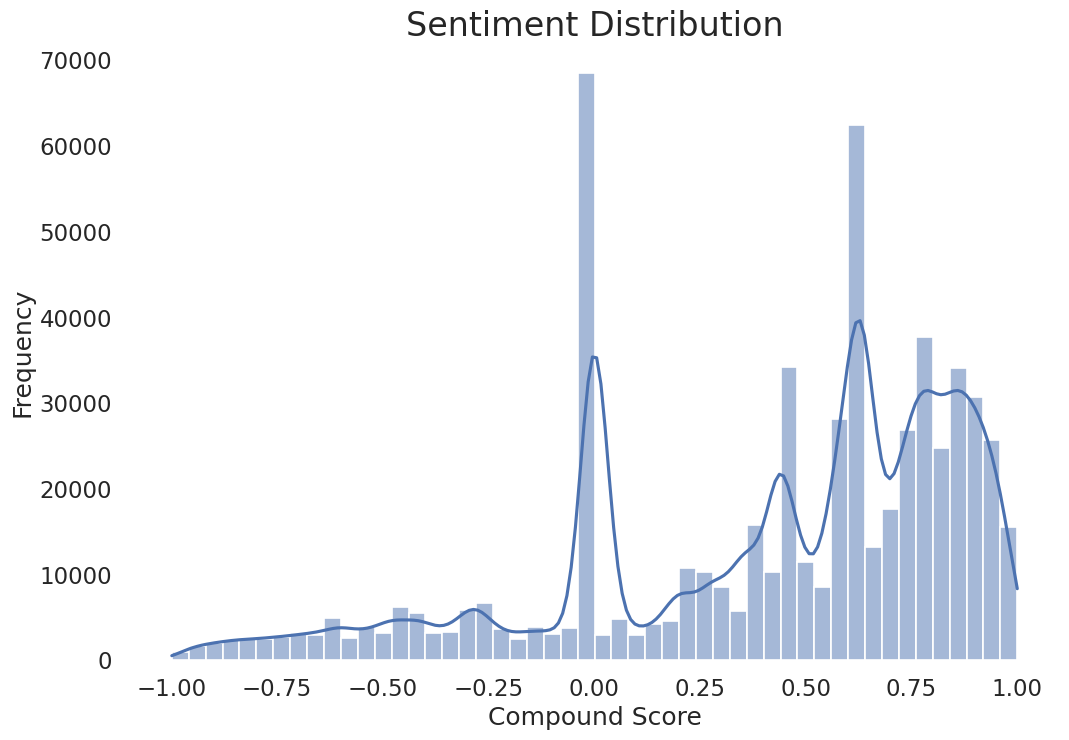

In [ ]:
## 3.1 Sentiment Scores Distribution Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,8))

# Use histplot
sns.histplot(x="sentiment_score",
             data=myData,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.04
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score")

# Remove ylabel
ax.set_ylabel("Frequency")

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

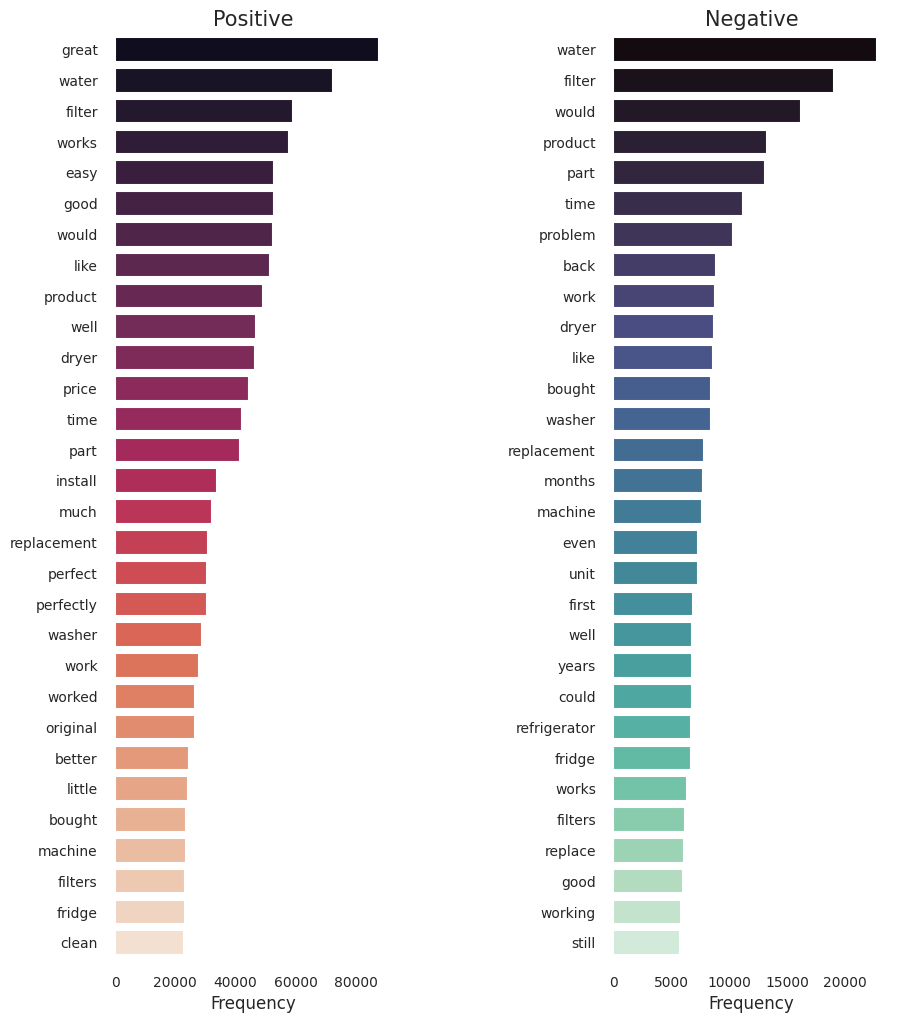

In [ ]:
## 3.2 Most Frequent Words (Bar Chart)

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(10,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFPos,
            palette="rocket",
            ax=ax[0]
            )

ax[0].set_title('Positive',fontsize=15)
ax[0].set_ylabel('')

# Adjust x-axis label font size
ax[0].set_xlabel('Frequency', fontsize=12)  # Adjust x-axis label font size

ax[0].tick_params(axis='x', labelsize=10)  # Adjust x-axis tick label font size
ax[0].tick_params(axis='y', labelsize=10)  # Adjust y-axis tick label font size

# Barplot for negative tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFNeg,
            palette="mako",
            ax=ax[1]
            )

ax[1].set_title('Negative',fontsize=15)
ax[1].set_ylabel('')

# Adjust x-axis label font size
ax[1].set_xlabel('Frequency', fontsize=12)  # Adjust x-axis label font size

ax[1].tick_params(axis='x', labelsize=10)  # Adjust x-axis tick label font size
ax[1].tick_params(axis='y', labelsize=10)  # Adjust y-axis tick label font size

# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

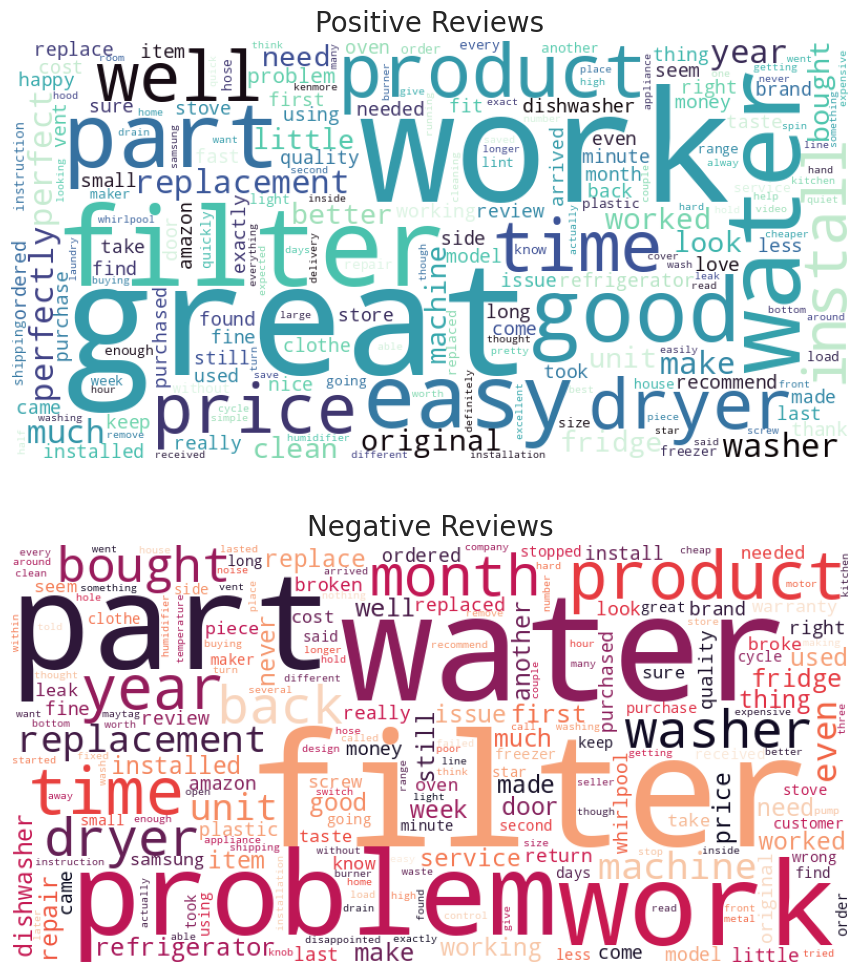

In [ ]:
## 1.3 Most Frequent Words (Word Cloud)

# Use the package wordcloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako',
                       max_font_size=150
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews',fontsize=20)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket',
                       max_font_size=150
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews',fontsize=20)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

In [ ]:
## 1.4 Bigram Networks

# Prepare the bigram network

# We need some viz tools
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz

# We need networkx
import networkx as nx
import matplotlib.pyplot as plt

# For positive reviews

# Collect the result
myResultPos = bigramFreqPos.most_common(50)
# Construct the network
G_pos = nx.DiGraph()
# Create connections between nodes
for i in myResultPos:
    G_pos.add_edge(i[0][0], i[0][1], weight=(i[1]))

# For negative reviews

# Collect the result
myResultNeg = bigramFreqNeg.most_common(50)
# Construct the network
G_neg = nx.DiGraph()
# Create connections between nodes
for i in myResultNeg:
    G_neg.add_edge(i[0][0], i[0][1], weight=(i[1]))

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/m

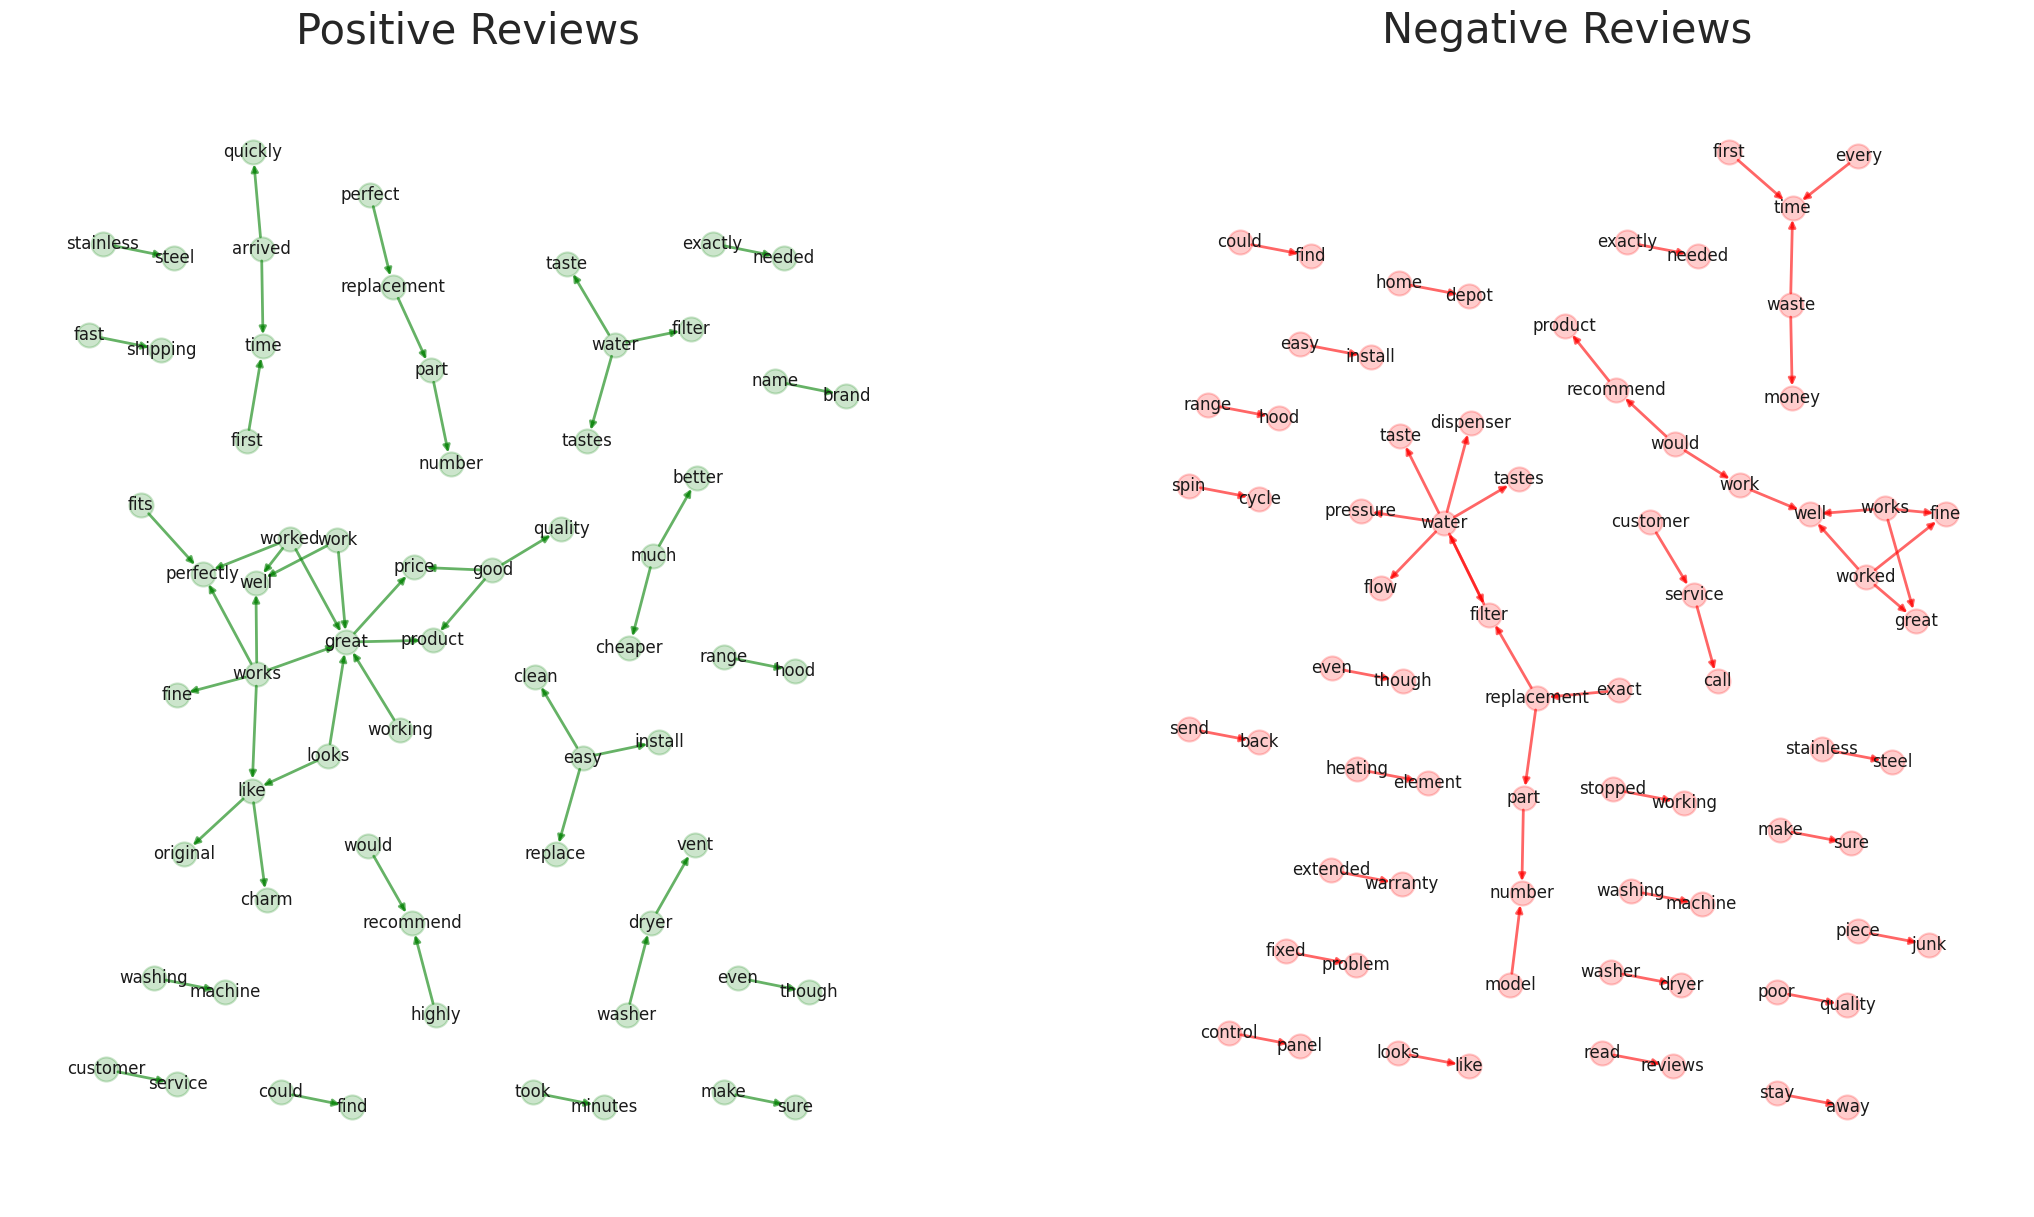

In [ ]:
# Visualisation of Bigram

import seaborn as sns

# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = nx.nx_agraph.graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews',fontsize=30)

# For negative subplot

# use another layout
pos_neg = nx.nx_agraph.graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()